# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import joblib
import warnings

# import joblib
import joblib

warnings.filterwarnings('ignore')
# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [2]:
# Load dataset
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [3]:
# Tampilkan 5 baris pertama dengan function head.
print("Lima baris pertama dataset:")
print(df.head())

Lima baris pertama dataset:
  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0         70.0             

In [4]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
print("Informasi Dataset:")
df.info()

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  Accou

In [5]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
print("Statistik Deskriptif Dataset:")
print(df.describe(include='all'))

Statistik Deskriptif Dataset:
       TransactionID AccountID  TransactionAmount      TransactionDate  \
count           2508      2516        2511.000000                 2509   
unique          2484       495                NaN                 2485   
top         TX002326   AC00362                NaN  2023-12-22 16:42:33   
freq               2        12                NaN                    2   
mean             NaN       NaN         297.656468                  NaN   
std              NaN       NaN         292.230367                  NaN   
min              NaN       NaN           0.260000                  NaN   
25%              NaN       NaN          81.310000                  NaN   
50%              NaN       NaN         211.360000                  NaN   
75%              NaN       NaN         413.105000                  NaN   
max              NaN       NaN        1919.110000                  NaN   

       TransactionType    Location DeviceID      IP Address MerchantID  \
count  

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

Matriks Korelasi Antar Fitur Numerik:


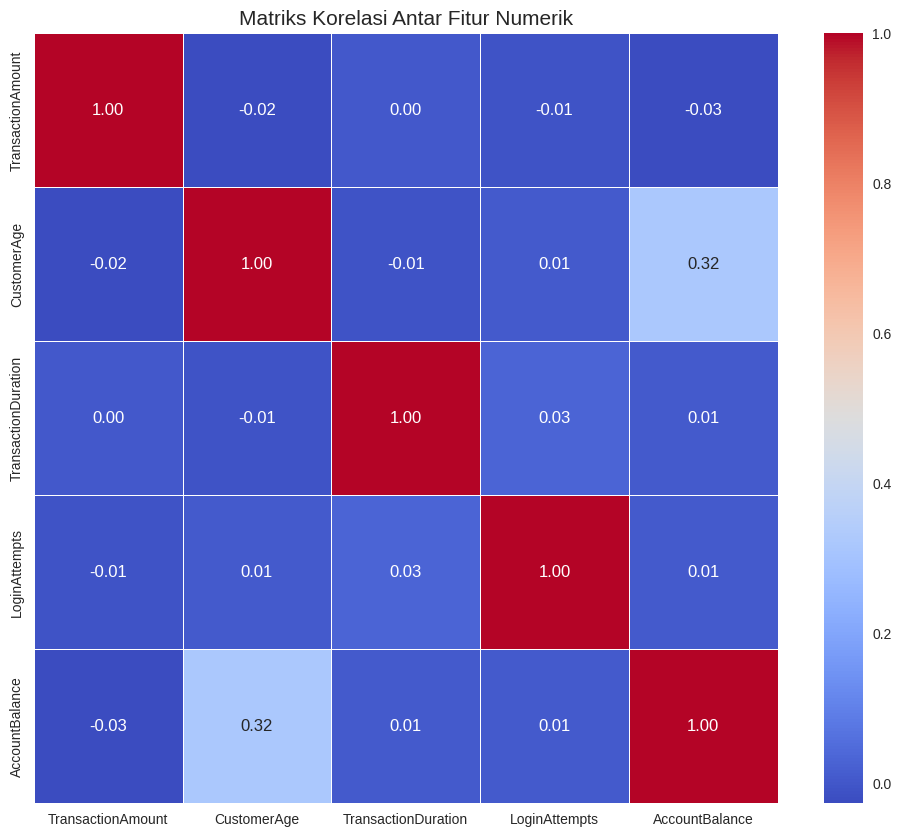

In [6]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
print("Matriks Korelasi Antar Fitur Numerik:")
# Mengidentifikasi kolom numerik berdasarkan tipe data, mengecualikan kolom ID jika masih ada
numerical_features_for_corr = df.select_dtypes(include=np.number).columns
# Hapus kolom 'CustomerID' jika ada di antara fitur numerik
if 'CustomerID' in numerical_features_for_corr:
    numerical_features_for_corr = numerical_features_for_corr.drop('CustomerID')


if len(numerical_features_for_corr) > 1:
    correlation_matrix = df[numerical_features_for_corr].corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Matriks Korelasi Antar Fitur Numerik', fontsize=15)
    plt.show()
else:
    print("Tidak cukup fitur numerik (setelah eksklusi ID) untuk membuat matriks korelasi.")

Histogram untuk Fitur Numerik:


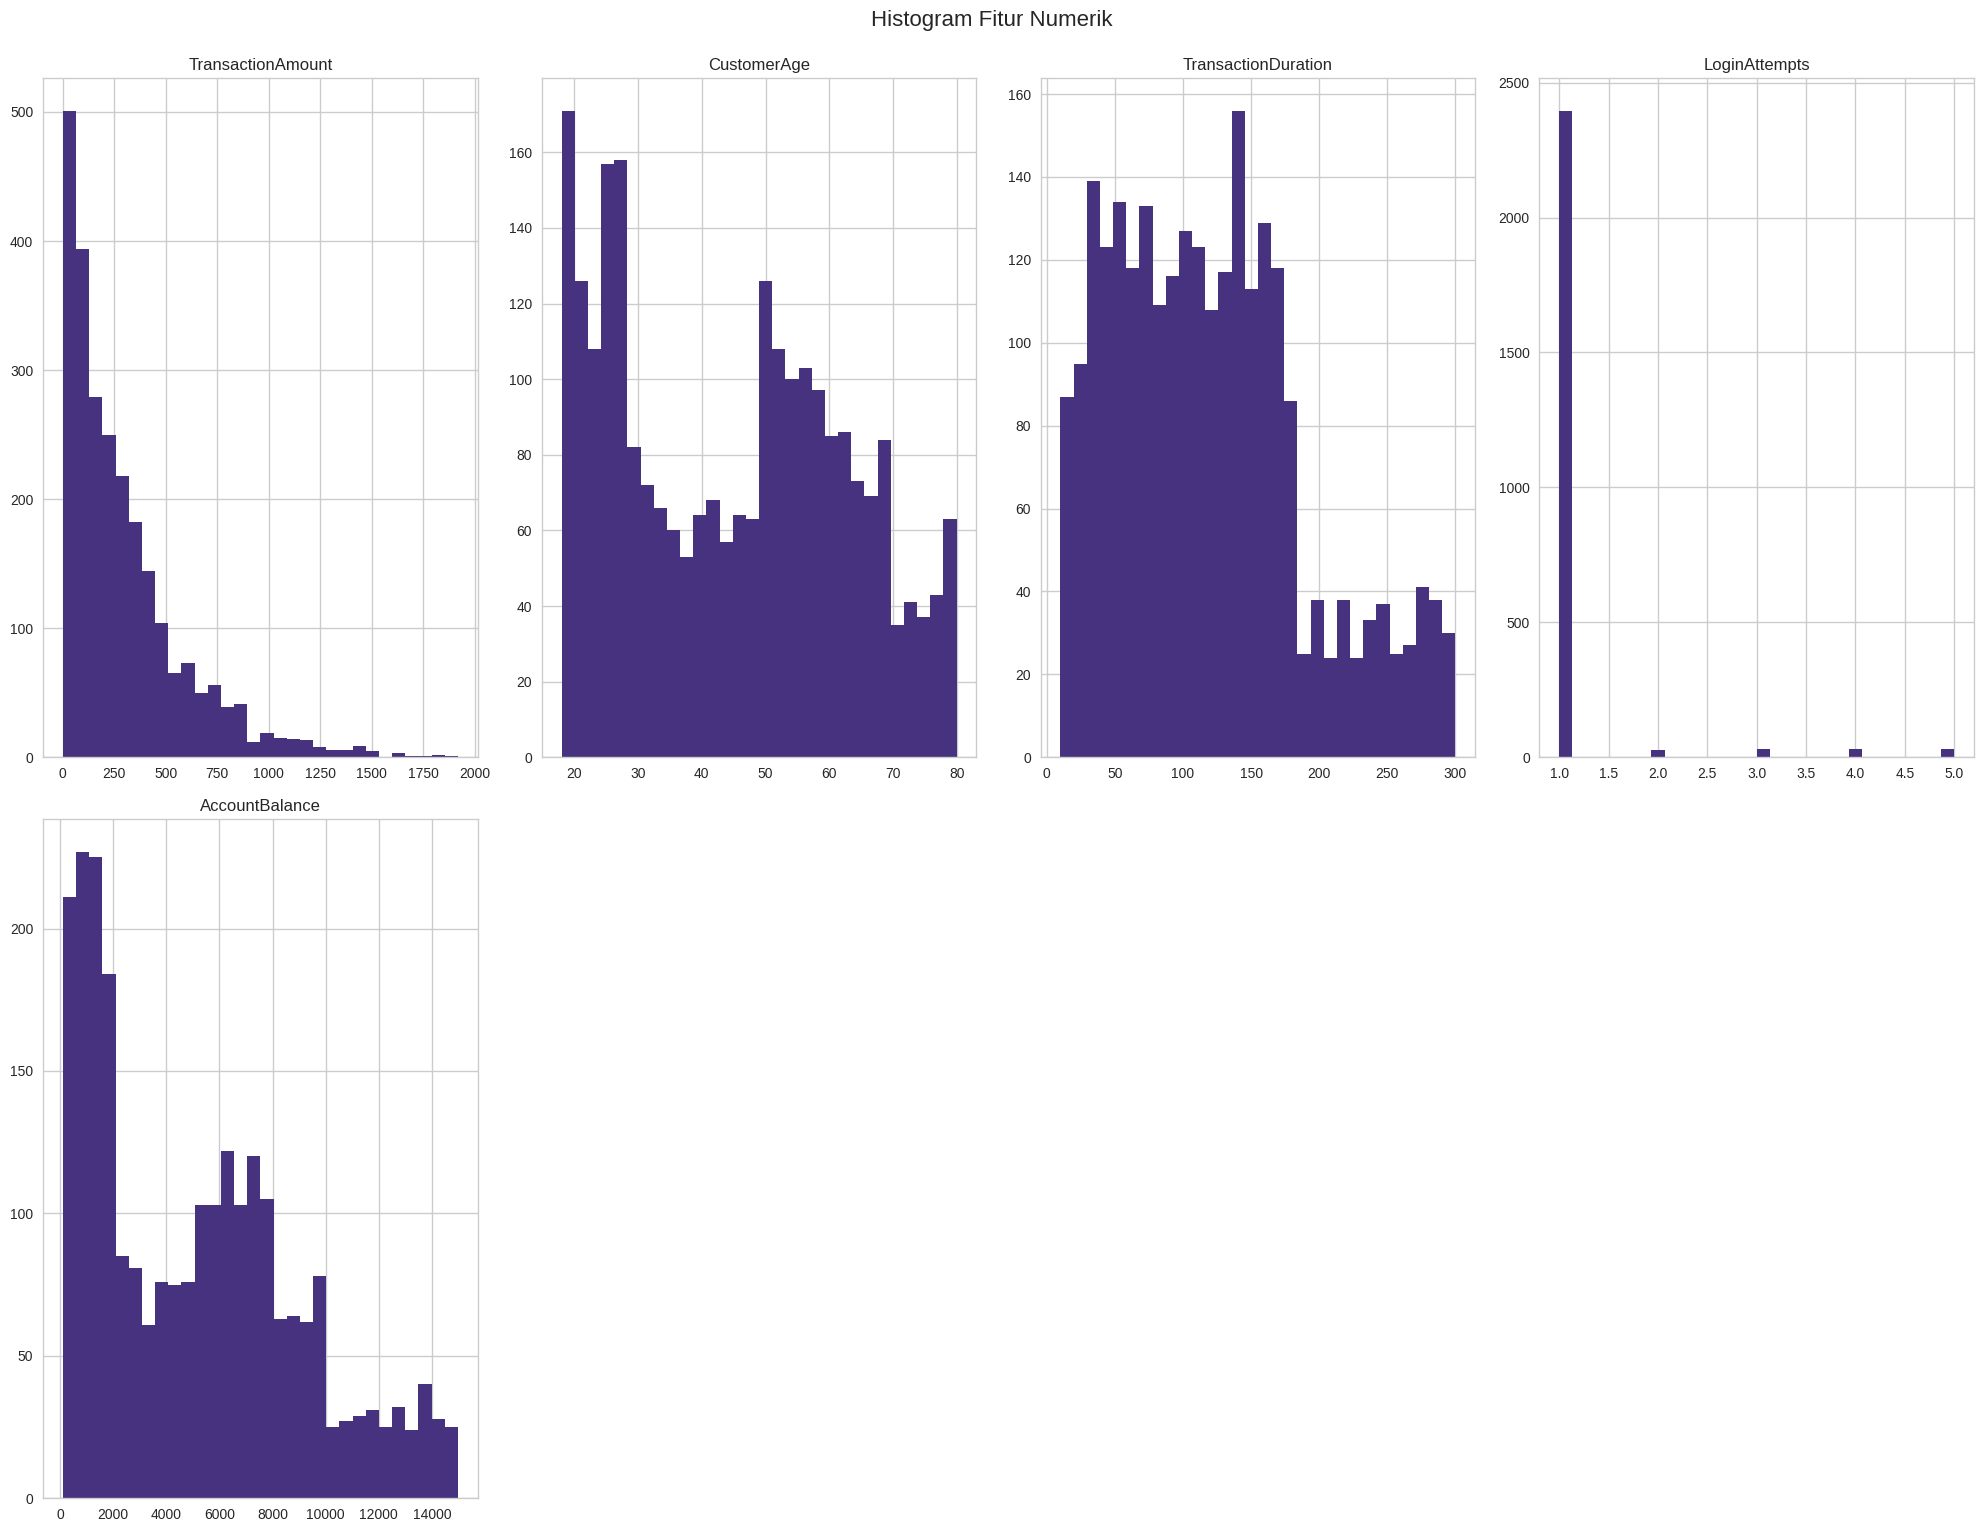

Distribusi untuk Fitur Kategorikal:


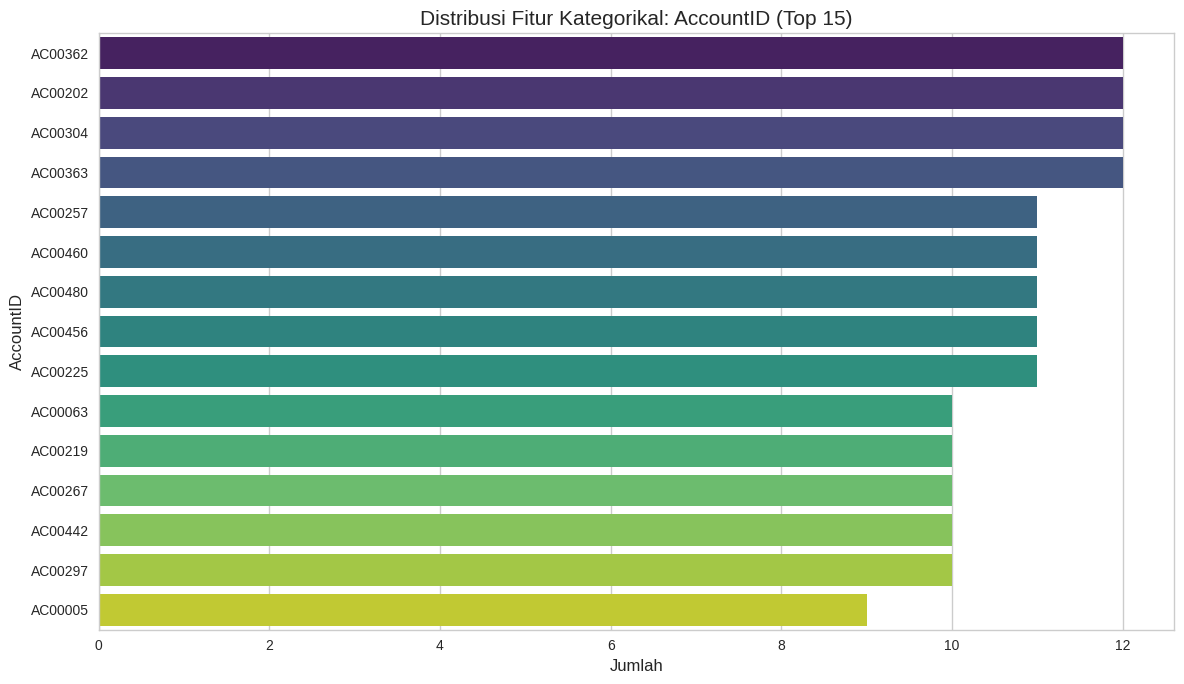

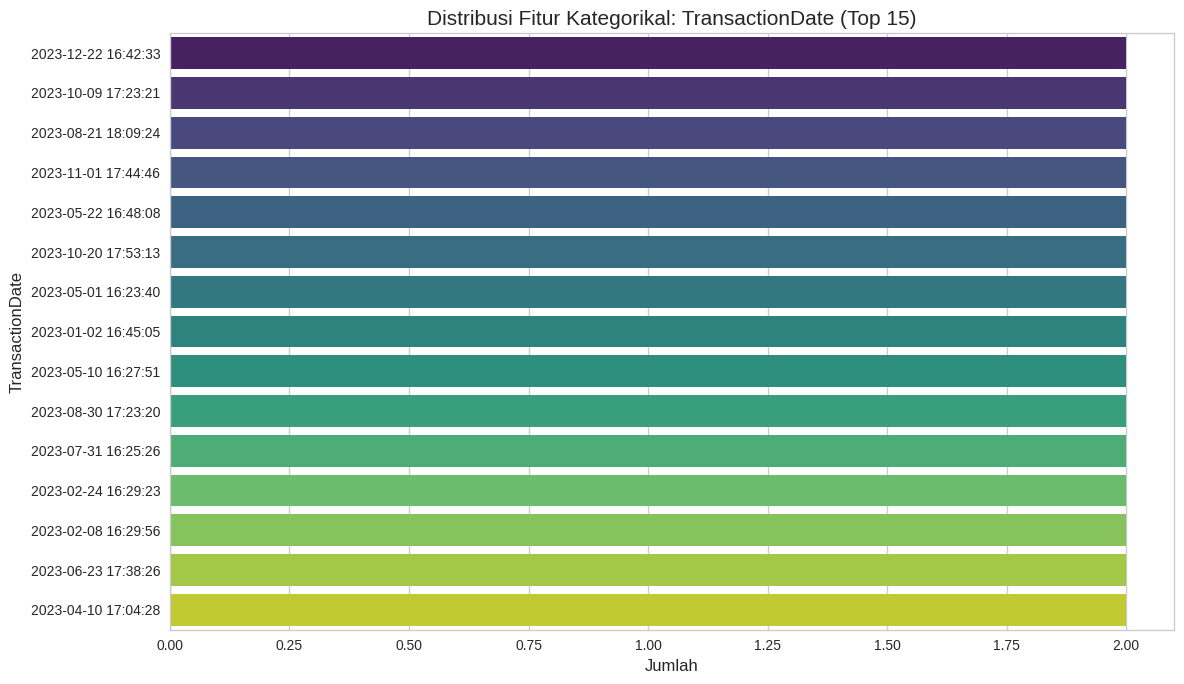

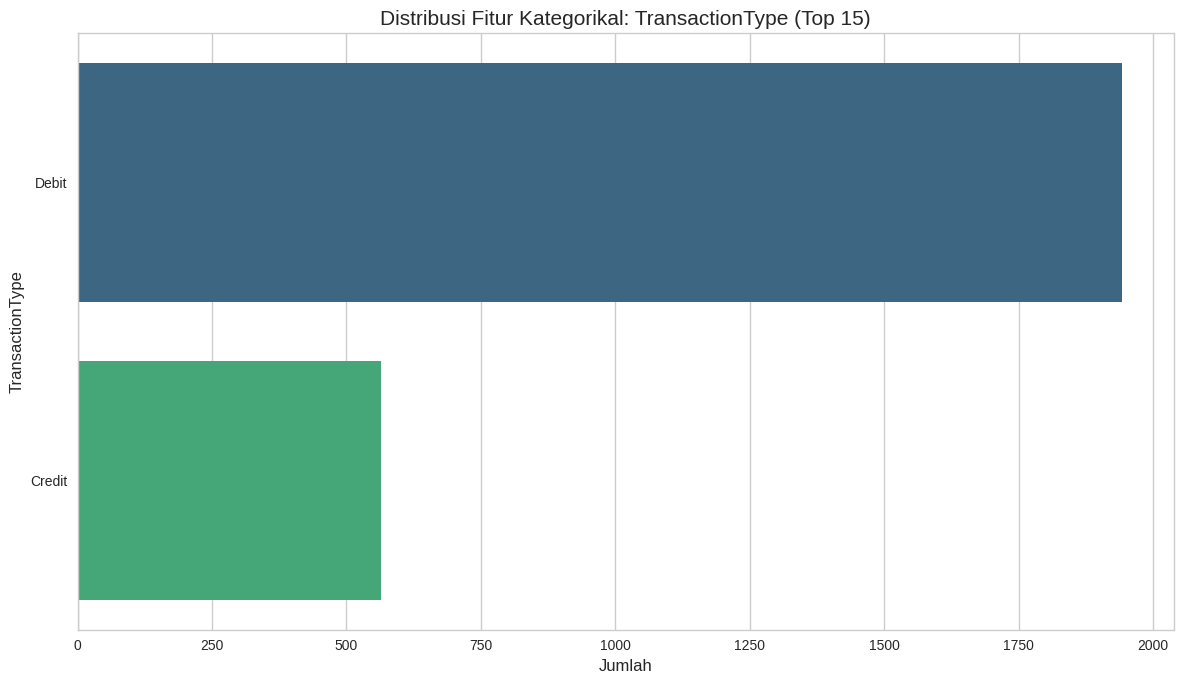

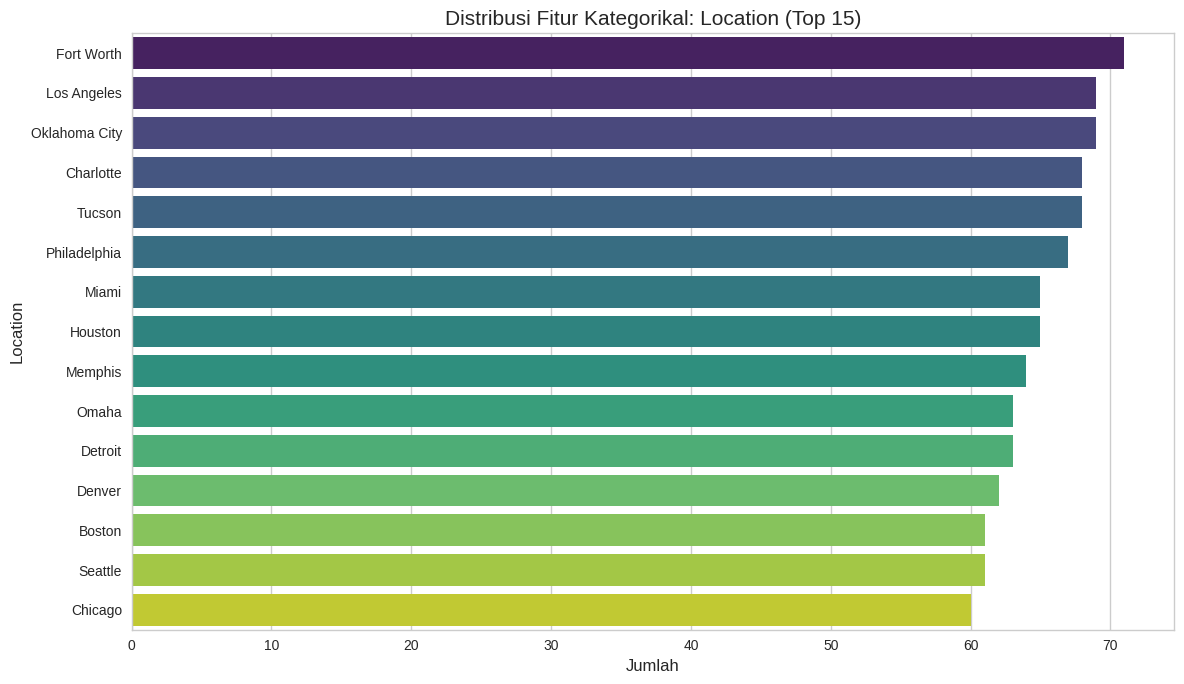

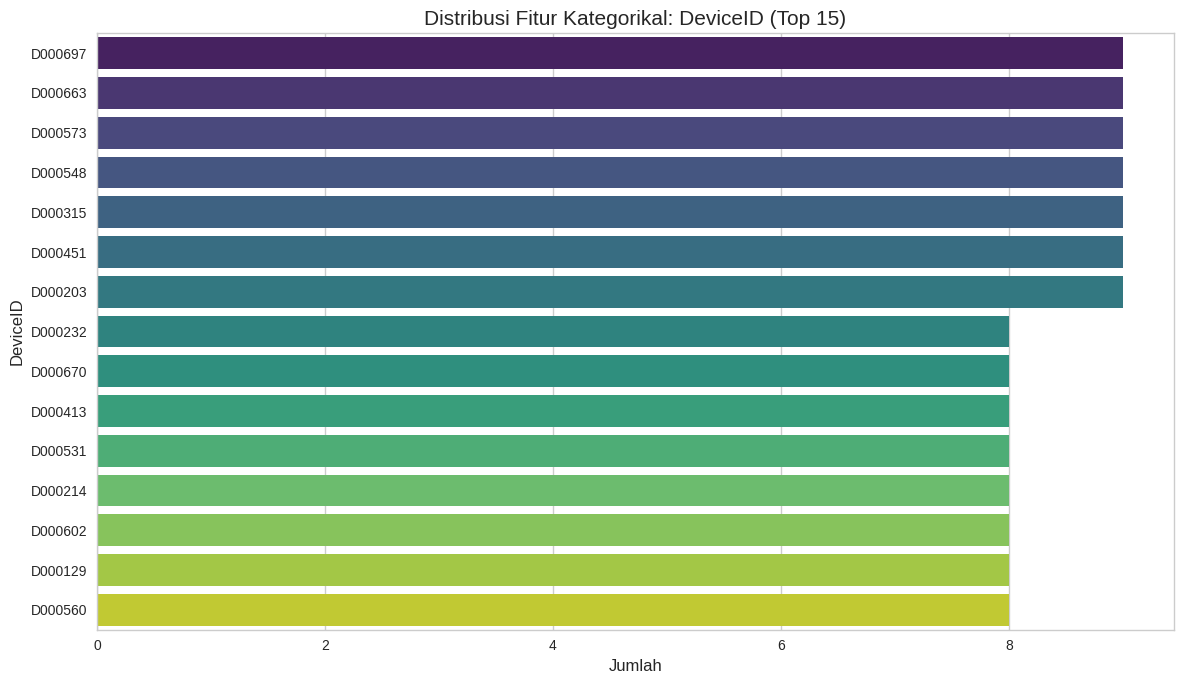

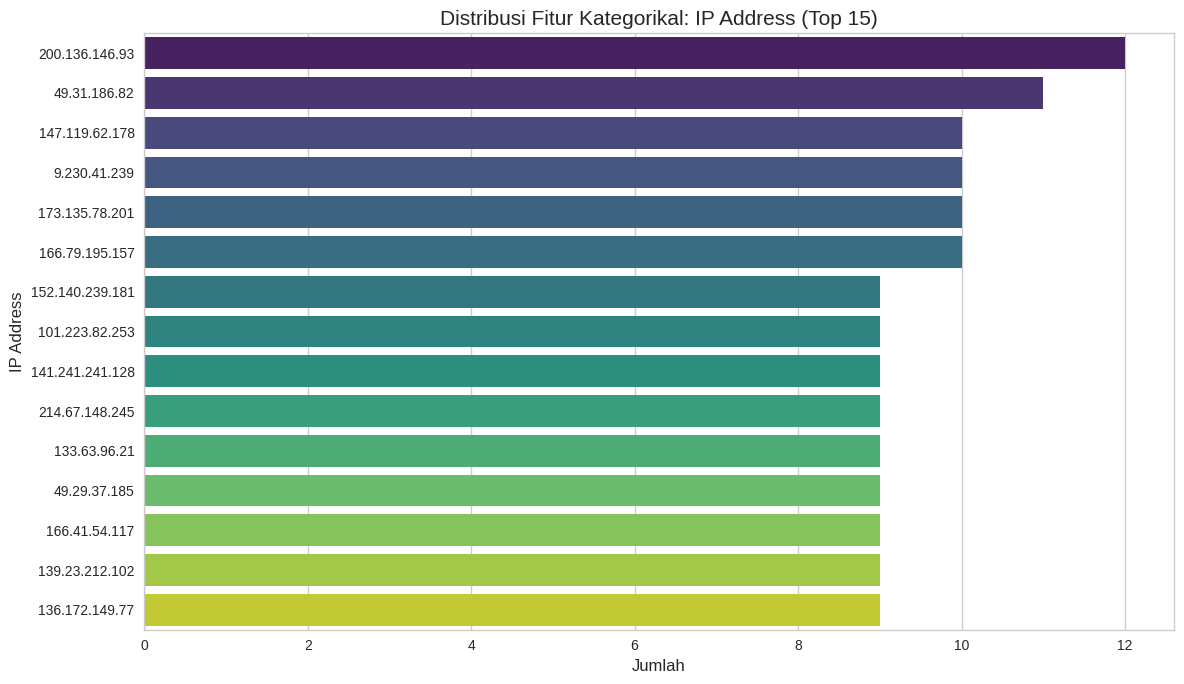

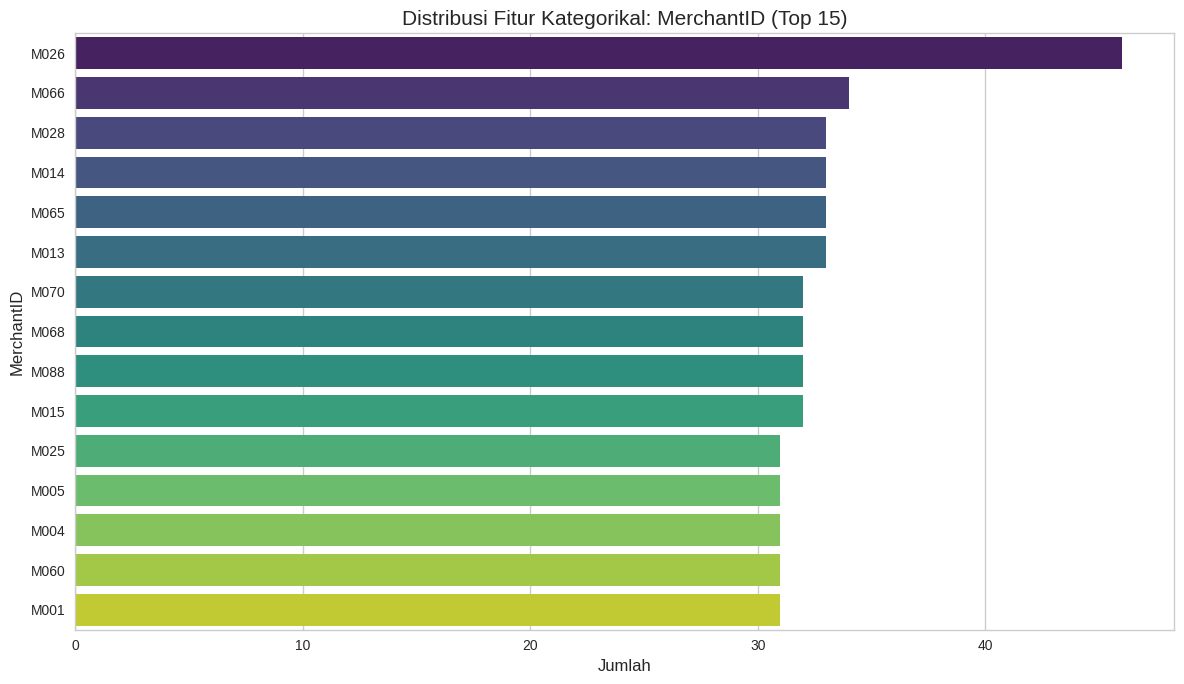

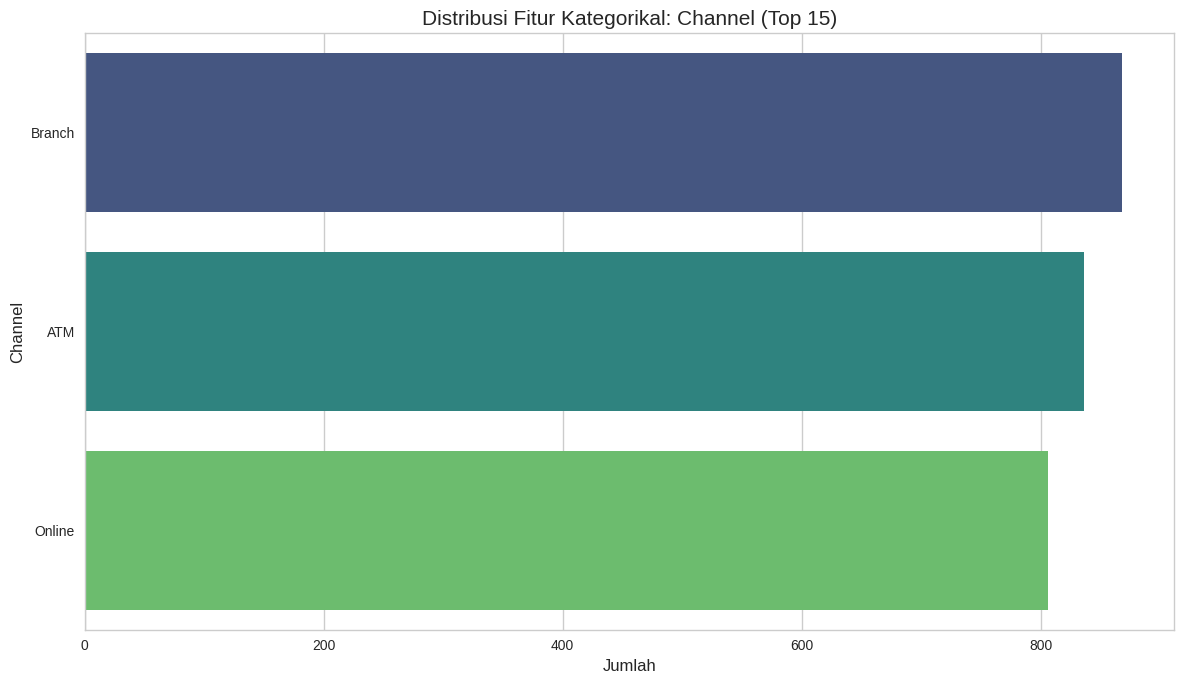

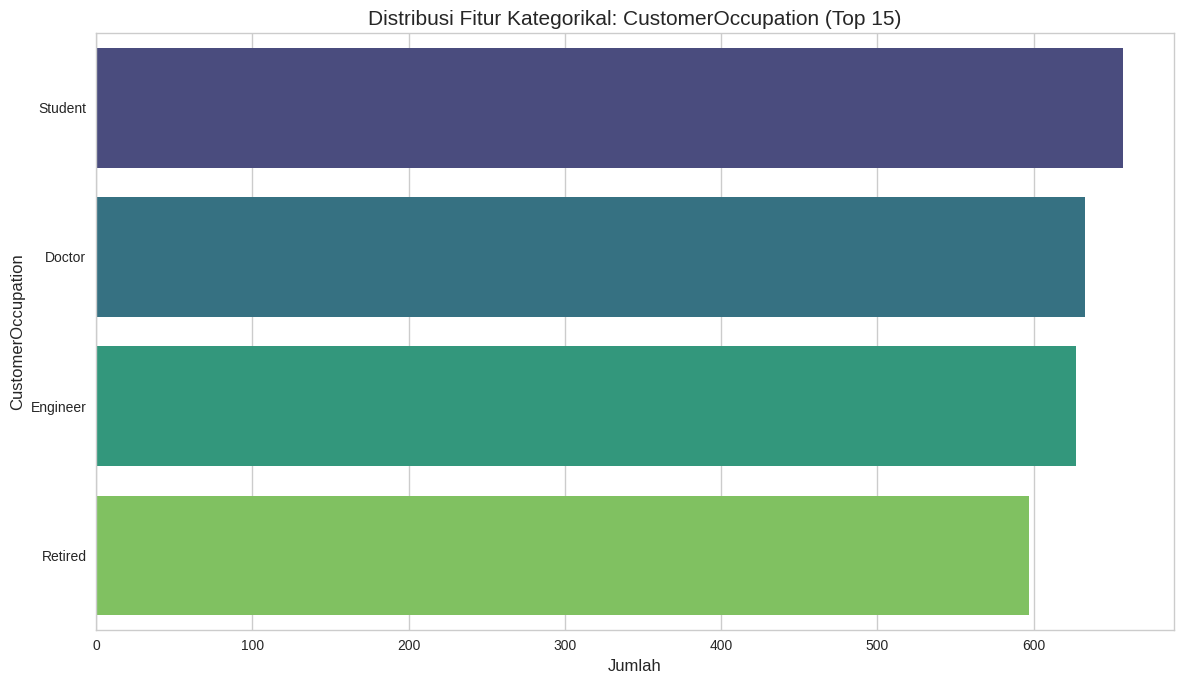

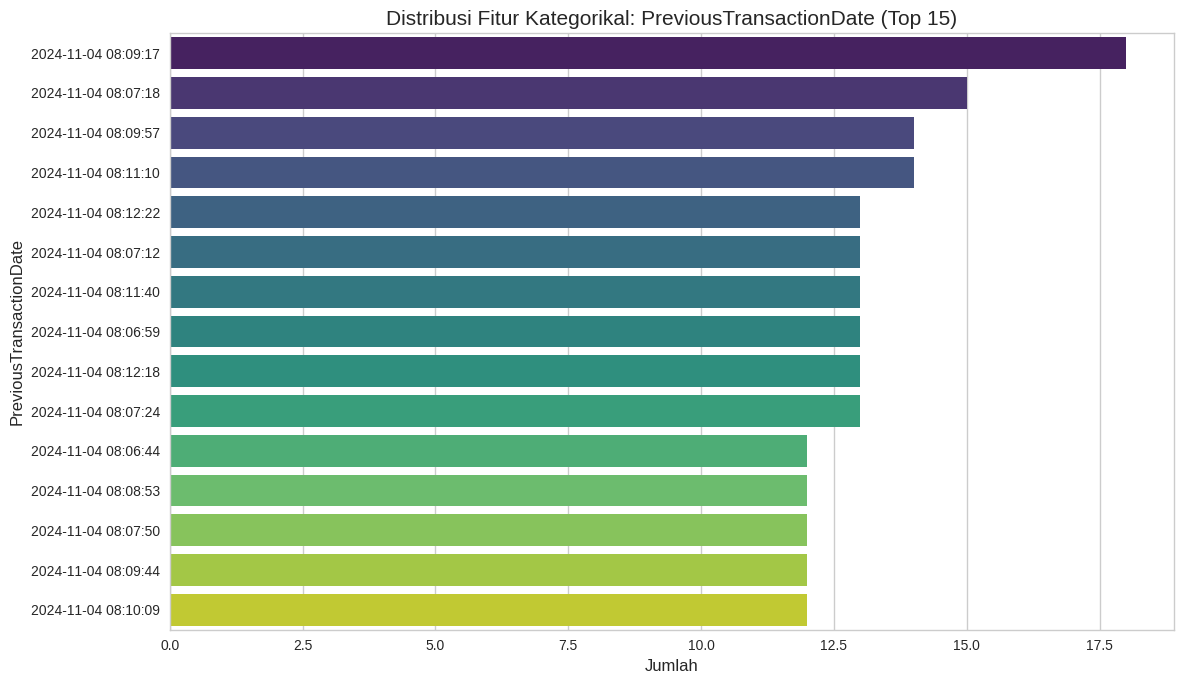

In [7]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
print("Histogram untuk Fitur Numerik:")
# Menggunakan list yang sama dengan korelasi (tanpa CustomerID)
if len(numerical_features_for_corr) > 0: # Menggunakan list yang sama dengan korelasi
    df[numerical_features_for_corr].hist(bins=30, figsize=(20, 15), layout=(-1, 4))
    plt.tight_layout()
    plt.suptitle('Histogram Fitur Numerik', y=1.02, fontsize=16)
    plt.show()
else:
    print("Tidak ada fitur numerik untuk membuat histogram.")

# Menampilkan countplot untuk semua kolom kategorikal (Opsional Skilled 1)
print("Distribusi untuk Fitur Kategorikal:")
categorical_features_for_hist = df.select_dtypes(include='object').columns
if 'TransactionID' in categorical_features_for_hist: # TransactionID mungkin object tapi bukan kategorikal sejati
    categorical_features_for_hist = categorical_features_for_hist.drop('TransactionID')


if len(categorical_features_for_hist) > 0:
    for col in categorical_features_for_hist:
        plt.figure(figsize=(12, 7)) # Ukuran disesuaikan agar lebih enak dilihat
        sns.countplot(y=col, data=df, order=df[col].value_counts().index[:15], palette='viridis') # Batasi top 15 kategori
        plt.title(f'Distribusi Fitur Kategorikal: {col} (Top 15)', fontsize=15)
        plt.xlabel('Jumlah', fontsize=12)
        plt.ylabel(col, fontsize=12)
        plt.xticks(rotation=0) # Rotasi dihilangkan karena sumbu y
        plt.tight_layout()
        plt.show()
else:
    print("Tidak ada fitur kategorikal (setelah eksklusi ID) untuk membuat countplot.")

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

Box Plot untuk Fitur Numerik (Advanced EDA):


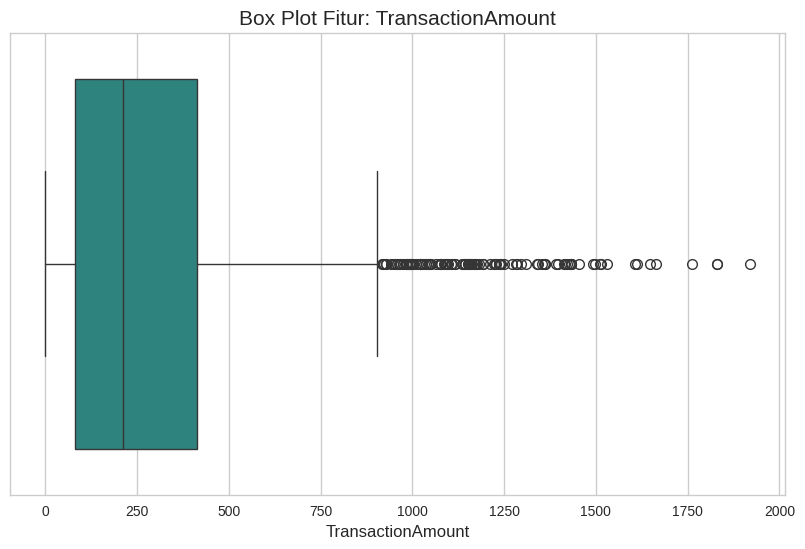

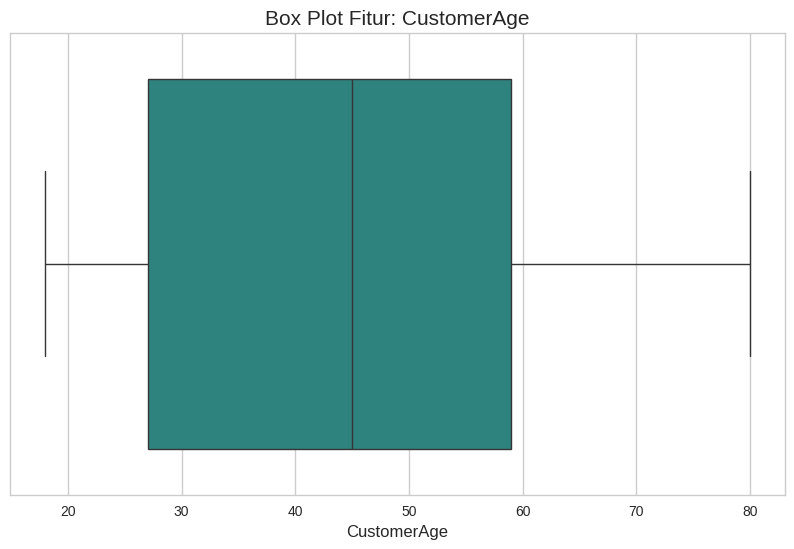

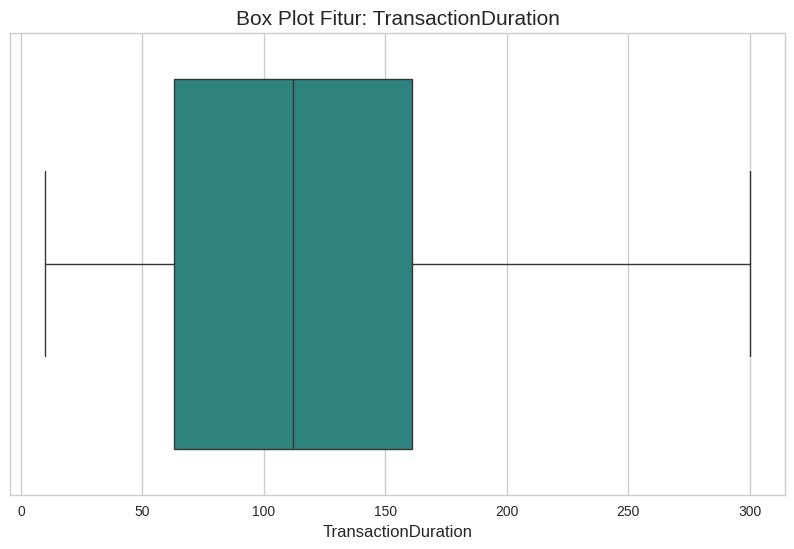

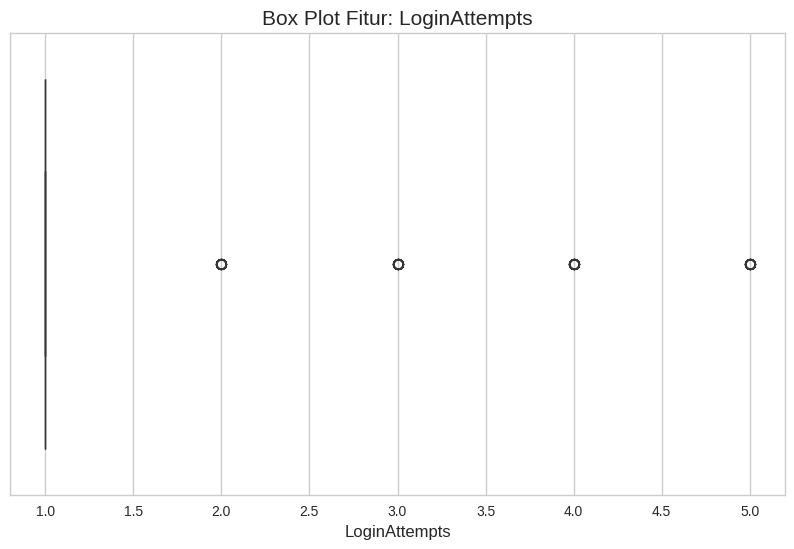

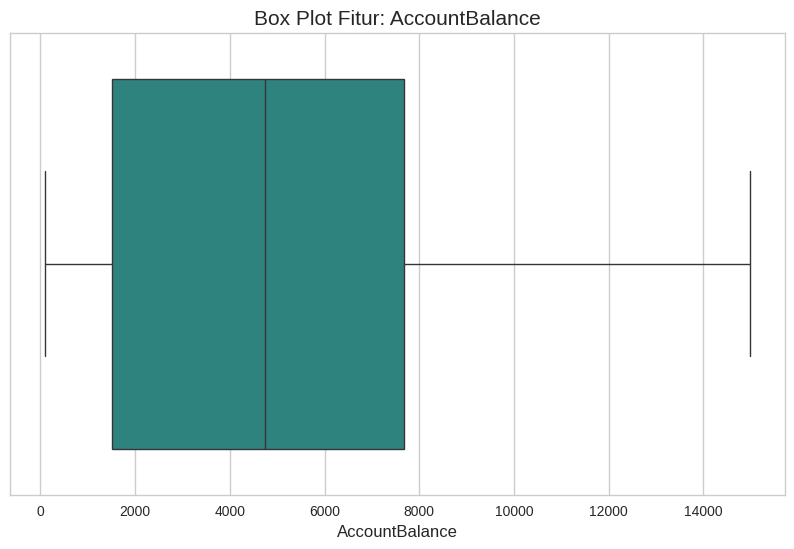

Pair Plot untuk beberapa Fitur Numerik (Advanced EDA):


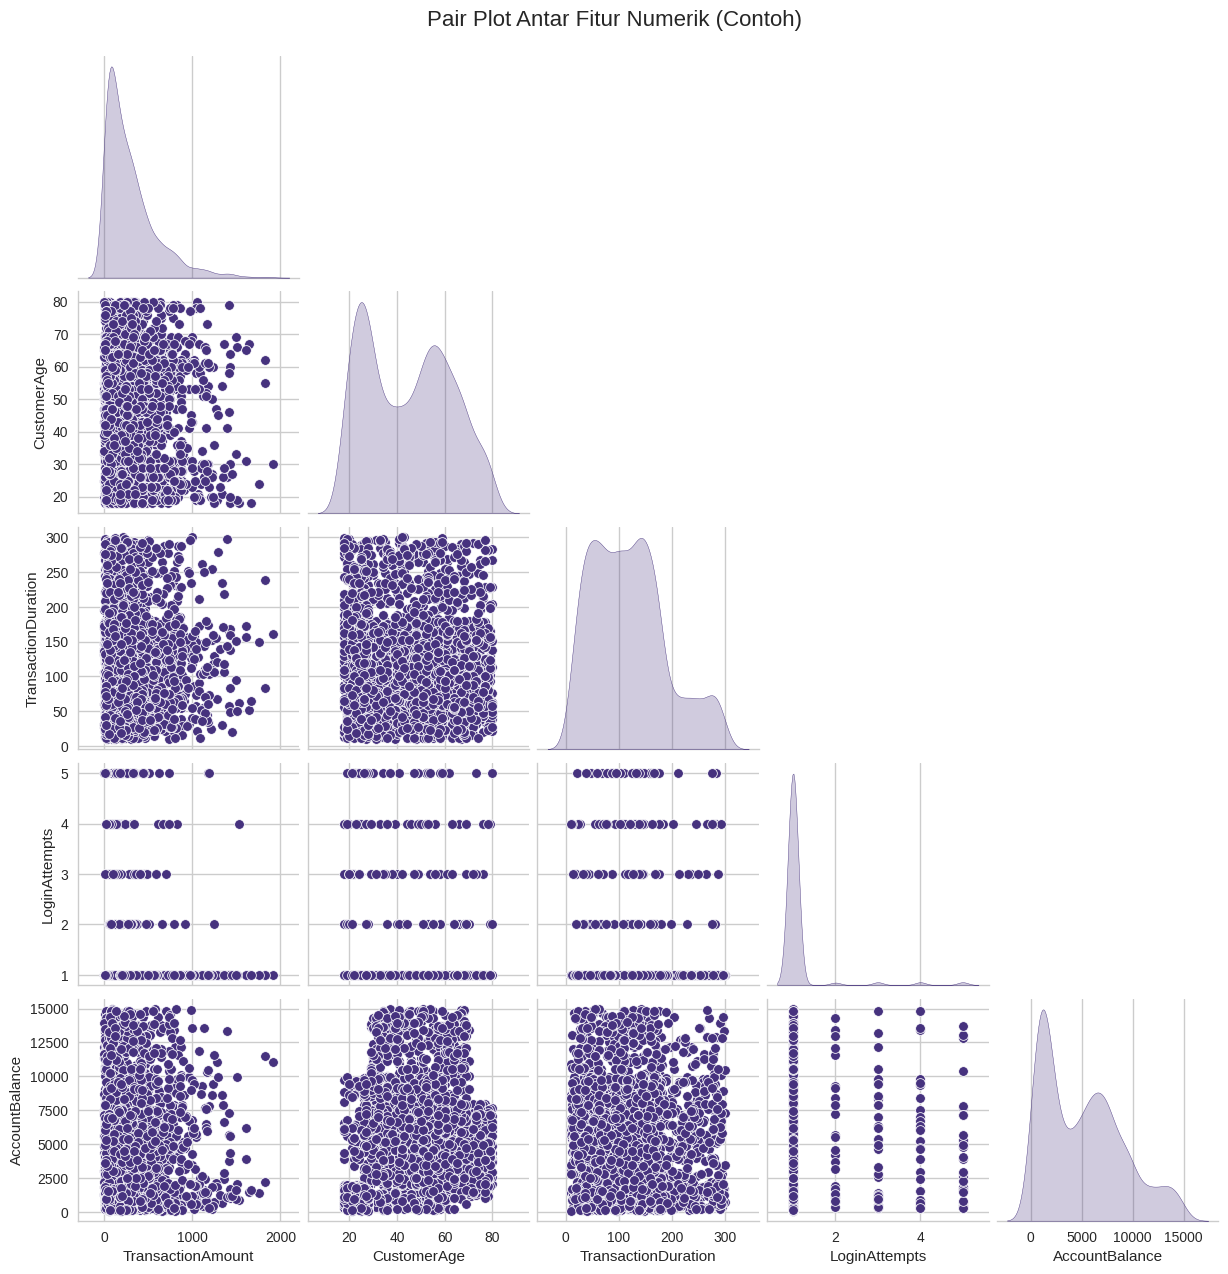

In [8]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
# Box plot untuk fitur numerik untuk melihat sebaran dan outlier
print("Box Plot untuk Fitur Numerik (Advanced EDA):")
# Menggunakan numerical_features_for_corr (tanpa CustomerID)
if len(numerical_features_for_corr) > 0:
    for col in numerical_features_for_corr:
        plt.figure(figsize=(10, 6)) # Ukuran disesuaikan
        sns.boxplot(x=df[col], palette='viridis')
        plt.title(f'Box Plot Fitur: {col}', fontsize=15)
        plt.xlabel(col, fontsize=12)
        plt.show()
else:
    print("Tidak ada fitur numerik untuk membuat box plot.")

# Pairplot untuk melihat hubungan antar beberapa fitur numerik (pilih beberapa jika terlalu banyak)
print("Pair Plot untuk beberapa Fitur Numerik (Advanced EDA):")
if len(numerical_features_for_corr) > 1:
    # Pilih maksimal 5 fitur untuk pairplot agar tidak terlalu padat
    sample_numerical_features = numerical_features_for_corr[:min(5, len(numerical_features_for_corr))]
    if len(sample_numerical_features) > 1:
        sns.pairplot(df[sample_numerical_features], diag_kind='kde', corner=True)
        plt.suptitle('Pair Plot Antar Fitur Numerik (Contoh)', y=1.02, fontsize=16)
        plt.show()
    else:
        print("Tidak cukup fitur numerik yang dipilih untuk pairplot (minimal 2).")
else:
    print("Tidak cukup fitur numerik untuk membuat pair plot.")

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [9]:
# Mengecek dataset menggunakan isnull().sum()
print("\nJumlah Missing Values per Kolom:")
print(df.isnull().sum())


Jumlah Missing Values per Kolom:
TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64


In [10]:
# Mengecek dataset menggunakan duplicated().sum()
print("\nJumlah Data Duplikat:")
print(df.duplicated().sum())


Jumlah Data Duplikat:
21


In [11]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
print("Feature Scaling untuk Fitur Numerik:")

# Pilih hanya kolom numerik untuk scaling.
# Ini memastikan bahwa hanya fitur yang sudah diproses (encoded) atau asli numerik yang akan di-scale.
features_to_scale = df.select_dtypes(include=np.number).columns.tolist()

# Kita gunakan StandardScaler karena lebih umum dan kurang sensitif terhadap outlier dibandingkan MinMaxScaler
# setelah capping outlier dilakukan.
scaler = StandardScaler() # Atau MinMaxScaler()
if len(features_to_scale) > 0:
    df[features_to_scale] = scaler.fit_transform(df[features_to_scale])
    print("Dataset setelah scaling semua fitur (head):")
    print(df.head())
else:
    print("Tidak ada fitur untuk di-scale.")

Feature Scaling untuk Fitur Numerik:
Dataset setelah scaling semua fitur (head):
  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128          -0.970546  2023-04-11 16:29:14   
1      TX000002   AC00455           0.268963  2023-06-27 16:44:19   
2      TX000003   AC00019          -0.586526  2023-07-10 18:16:08   
3      TX000004   AC00070          -0.387294  2023-05-05 16:32:11   
4      TX000005   AC00411          -0.972736  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionD

In [12]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
# Berdasarkan dataset, 'TransactionID' dan 'CustomerID' adalah ID.
# 'IPAddress' tidak ada di dataset ini.
columns_to_drop_identified = []
if 'TransactionID' in df.columns:
    columns_to_drop_identified.append('TransactionID')
if 'CustomerID' in df.columns:
    columns_to_drop_identified.append('CustomerID')

# Kolom tanggal/waktu seringkali tidak langsung berguna untuk K-Means tanpa rekayasa fitur
# Kita drop 'TransactionDate' dan 'TransactionTime' untuk saat ini.
# Jika ingin menggunakannya, perlu diubah menjadi fitur numerik (misal, hari dalam seminggu, jam, dll.)
if 'TransactionDate' in df.columns:
    columns_to_drop_identified.append('TransactionDate')
if 'TransactionTime' in df.columns:
    columns_to_drop_identified.append('TransactionTime')


if columns_to_drop_identified:
    df.drop(columns=columns_to_drop_identified, inplace=True)
    print(f"Kolom yang di-drop: {columns_to_drop_identified}")
else:
    print("Tidak ada kolom ID/IP Address yang ditemukan dari daftar contoh untuk di-drop.")
print("Dataset setelah drop kolom ID/IP/Tanggal (head):")
print(df.head())

Kolom yang di-drop: ['TransactionID', 'TransactionDate']
Dataset setelah drop kolom ID/IP/Tanggal (head):
  AccountID  TransactionAmount TransactionType   Location DeviceID  \
0   AC00128          -0.970546           Debit  San Diego  D000380   
1   AC00455           0.268963           Debit    Houston  D000051   
2   AC00019          -0.586526           Debit       Mesa  D000235   
3   AC00070          -0.387294           Debit    Raleigh  D000187   
4   AC00411          -0.972736          Credit    Atlanta  D000308   

       IP Address MerchantID Channel  CustomerAge CustomerOccupation  \
0  162.198.218.92       M015     ATM     1.419862             Doctor   
1     13.149.61.4       M052     ATM     1.307715             Doctor   
2  215.97.143.157       M009  Online    -1.439874            Student   
3  200.13.225.150       M002  Online    -1.047361            Student   
4    65.164.3.100       M091  Online          NaN            Student   

   TransactionDuration  LoginAttempts  A

In [13]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
print("Feature Encoding untuk Fitur Kategorikal:")
# Identifikasi ulang fitur kategorikal setelah drop kolom
categorical_features = df.select_dtypes(include='object').columns
label_encoders = {} # Simpan encoders untuk inverse transform nanti

if len(categorical_features) > 0:
    print(f"Fitur kategorikal yang akan di-encode: {categorical_features.tolist()}")
    for col in categorical_features:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
        print(f"Encoding untuk kolom: {col} selesai.")
    print("Dataset setelah encoding fitur kategorikal (head dari kolom yang diencode):")
    print(df[categorical_features].head())
else:
    print("Tidak ada fitur kategorikal untuk di-encode.")

Feature Encoding untuk Fitur Kategorikal:
Fitur kategorikal yang akan di-encode: ['AccountID', 'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation', 'PreviousTransactionDate']
Encoding untuk kolom: AccountID selesai.
Encoding untuk kolom: TransactionType selesai.
Encoding untuk kolom: Location selesai.
Encoding untuk kolom: DeviceID selesai.
Encoding untuk kolom: IP Address selesai.
Encoding untuk kolom: MerchantID selesai.
Encoding untuk kolom: Channel selesai.
Encoding untuk kolom: CustomerOccupation selesai.
Encoding untuk kolom: PreviousTransactionDate selesai.
Dataset setelah encoding fitur kategorikal (head dari kolom yang diencode):
   AccountID  TransactionType  Location  DeviceID  IP Address  MerchantID  \
0        126                1        36       365         186          14   
1        450                1        15        50          82          51   
2         18                1        23       229         342          

In [14]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
print("Kolom Final dalam DataFrame sebelum pemilihan fitur untuk clustering:")
print(df.columns.tolist())

Kolom Final dalam DataFrame sebelum pemilihan fitur untuk clustering:
['AccountID', 'TransactionAmount', 'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate']


(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [15]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
# Cek kolom mana yang punya missing values dan tipe datanya
missing_info = df.isnull().sum()
missing_cols = missing_info[missing_info > 0].index.tolist()

if missing_cols:
    print(f"Kolom dengan missing values: {missing_cols}")
    for col in missing_cols:
        if pd.api.types.is_numeric_dtype(df[col]):
            # Imputasi numerik dengan median (lebih robust terhadap outlier daripada mean)
            df[col].fillna(df[col].median(), inplace=True)
            print(f"Missing values di '{col}' (numerik) diimputasi dengan median.")
        elif pd.api.types.is_datetime64_any_dtype(df[col]):
            # Untuk datetime, bisa imputasi dengan ffill, bfill, atau nilai tertentu
            # Karena ini clustering, dan tidak ada informasi lebih, kita ffill jika ada
            df[col].fillna(method='ffill', inplace=True)
            df[col].fillna(method='bfill', inplace=True) # Jika ffill tidak mengisi semua (misal di awal)
            print(f"Missing values di '{col}' (datetime) diimputasi dengan ffill/bfill.")
        else:
            # Imputasi kategorikal/object dengan modus
            mode_val = df[col].mode()
            if not mode_val.empty:
                df[col].fillna(mode_val[0], inplace=True)
                print(f"Missing values di '{col}' (kategorikal/object) diimputasi dengan modus '{mode_val[0]}'.")
            else: # Jika modus kosong (sangat jarang)
                df.dropna(subset=[col], inplace=True)
                print(f"Missing values di '{col}' di-drop karena modus tidak ditemukan.")

    print("Jumlah Missing Values setelah imputasi/dropna:")
    print(df.isnull().sum())
else:
    print("Tidak ada missing values yang perlu ditangani.")

# Jika setelah imputasi masih ada (misal ffill/bfill tidak mengisi semua), maka dropna
df.dropna(inplace=True)
print("Jumlah Missing Values setelah final dropna (jika ada sisa):")
print(df.isnull().sum())

Kolom dengan missing values: ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
Missing values di 'TransactionAmount' (numerik) diimputasi dengan median.
Missing values di 'CustomerAge' (numerik) diimputasi dengan median.
Missing values di 'TransactionDuration' (numerik) diimputasi dengan median.
Missing values di 'LoginAttempts' (numerik) diimputasi dengan median.
Missing values di 'AccountBalance' (numerik) diimputasi dengan median.
Jumlah Missing Values setelah imputasi/dropna:
AccountID                  0
TransactionAmount          0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64
Jumlah Missing Values setelah final dropna (jika ad

In [16]:
# Menghapus data duplikat menggunakan drop_duplicates().
initial_rows = len(df)
df.drop_duplicates(inplace=True)
rows_after_dedup = len(df)
print(f"Jumlah baris sebelum drop_duplicates: {initial_rows}")
print(f"Jumlah baris setelah drop_duplicates: {rows_after_dedup}")
print(f"Jumlah data duplikat yang dihapus: {initial_rows - rows_after_dedup}")
print(f"Jumlah Data Duplikat setelah drop_duplicates: {df.duplicated().sum()}")

Jumlah baris sebelum drop_duplicates: 2537
Jumlah baris setelah drop_duplicates: 2514
Jumlah data duplikat yang dihapus: 23
Jumlah Data Duplikat setelah drop_duplicates: 0


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [17]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
# menggunakan metode IQR untuk fitur numerik (capping)
# 'numerical_features_for_corr' sudah tidak mengandung CustomerID
print("Handling Outliers (Advanced) dengan metode IQR (Capping):")
if len(numerical_features_for_corr) > 0:
    df_outlier_check = df[numerical_features_for_corr].copy() # Buat salinan untuk statistik sebelum
    print("Statistik deskriptif SEBELUM penanganan outlier:")
    print(df_outlier_check.describe())

    for col in numerical_features_for_corr:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers_before = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
        outliers_after = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0] # Seharusnya 0 setelah capping
        if outliers_before > 0:
             print(f"Fitur '{col}': {outliers_before} outliers di-cap. Outliers setelah: {outliers_after}")

    print("Statistik deskriptif SETELAH penanganan outlier (capping):")
    print(df[numerical_features_for_corr].describe())
else:
    print("Tidak ada fitur numerik yang teridentifikasi untuk penanganan outlier.")

Handling Outliers (Advanced) dengan metode IQR (Capping):
Statistik deskriptif SEBELUM penanganan outlier:
       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2514.000000  2514.000000          2514.000000    2514.000000   
mean           -0.002398    -0.003069             0.000702       0.000163   
std             0.996518     0.994836             0.994014       1.000580   
min            -1.017881    -1.495947            -1.561745      -0.204629   
25%            -0.734076    -0.991288            -0.805299      -0.204629   
50%            -0.295362     0.018031            -0.105944      -0.204629   
75%             0.383159     0.803056             0.593411      -0.204629   
max             5.549651     1.980594             2.577295       6.525404   

       AccountBalance  
count     2514.000000  
mean        -0.000193  
std          0.995102  
min         -1.286100  
25%         -0.922221  
50%         -0.097334  
75%          0.648772  
max    

In [18]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.

print("\nBinning Data (Advanced):")

# Misalkan nama kolomnya tetap 'TransactionAmount' setelah encoding dan ada di 'df.columns'
target_bin_col_name = 'TransactionAmount' # Ganti dengan nama kolom yang sesuai di df Anda

if target_bin_col_name in df.columns and pd.api.types.is_numeric_dtype(df[target_bin_col_name]):
    num_bins = 3 # Low, Medium, High
    bin_labels = [f'Amount_Bin_{i+1}' for i in range(num_bins)]

    # Karena data sudah di-scale, binning pada nilai scaled
    df[f'{target_bin_col_name}_Binned_Category'] = pd.cut(df[target_bin_col_name], bins=num_bins, labels=bin_labels, include_lowest=True)

    binned_encoder = LabelEncoder()
    # Nama kolom baru untuk encoded bin, nama unik
    binned_encoded_col_name = f'{target_bin_col_name}_Binned_Encoded'
    df[binned_encoded_col_name] = binned_encoder.fit_transform(df[f'{target_bin_col_name}_Binned_Category'])
    label_encoders[binned_encoded_col_name] = binned_encoder # Simpan encoder

    print(f"Binning untuk fitur '{target_bin_col_name}' selesai.")
    print(df[[target_bin_col_name, f'{target_bin_col_name}_Binned_Category', binned_encoded_col_name]].head())

    # Fitur asli 'TransactionAmount' dan 'TransactionAmount_Binned_Category' bisa di-drop jika tidak ingin duplikasi informasi.
    # df.drop(columns=[target_bin_col_name, f'{target_bin_col_name}_Binned_Category'], inplace=True)
else:
    print(f"Fitur '{target_bin_col_name}' tidak ditemukan atau bukan numerik untuk binning. Binning dilewati.")


Binning Data (Advanced):
Binning untuk fitur 'TransactionAmount' selesai.
   TransactionAmount TransactionAmount_Binned_Category  \
0          -0.970546                      Amount_Bin_1   
1           0.268963                      Amount_Bin_2   
2          -0.586526                      Amount_Bin_1   
3          -0.387294                      Amount_Bin_1   
4          -0.972736                      Amount_Bin_1   

   TransactionAmount_Binned_Encoded  
0                                 0  
1                                 1  
2                                 0  
3                                 0  
4                                 0  


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [19]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
X = df.select_dtypes(include=np.number).copy() # Pilih semua kolom numerik

cols_to_drop_from_X = [col for col in X.columns if '_Binned_Category' in col]
if cols_to_drop_from_X:
    X.drop(columns=cols_to_drop_from_X, inplace=True)

print("\nStatistik Deskriptif Data yang Akan Digunakan untuk Clustering (X):")
if X.empty:
    print("DataFrame X kosong! Cek langkah pra-pemrosesan.")
else:
    print(X.describe())
    print(f"\nDimensi X: {X.shape}")


Statistik Deskriptif Data yang Akan Digunakan untuk Clustering (X):
         AccountID  TransactionAmount  TransactionType     Location  \
count  2514.000000        2514.000000      2514.000000  2514.000000   
mean    248.371917          -0.048151         0.787987    21.284010   
std     144.389828           0.854233         0.437042    12.397534   
min       0.000000          -1.017881         0.000000     0.000000   
25%     123.250000          -0.734076         1.000000    11.000000   
50%     252.000000          -0.295362         1.000000    21.000000   
75%     372.000000           0.383159         1.000000    32.000000   
max     495.000000           2.059012         2.000000    43.000000   

          DeviceID   IP Address   MerchantID     Channel  CustomerAge  \
count  2514.000000  2514.000000  2514.000000  2514.00000  2514.000000   
mean    341.901352   299.144391    49.155131     1.01074    -0.003069   
std     200.724346   170.565288    29.315208     0.83084     0.994836   

Menentukan Jumlah Cluster Optimal dengan Elbow Method:


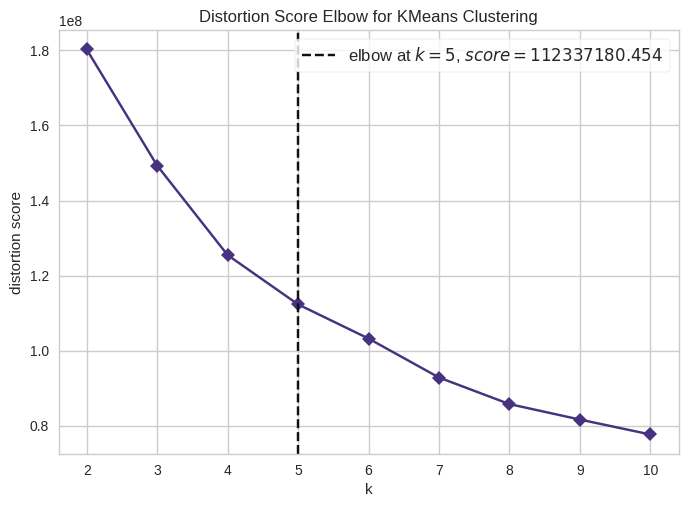

Optimal number of clusters (k) based on Elbow Method: 5


In [20]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
print("Menentukan Jumlah Cluster Optimal dengan Elbow Method:")
if X.empty or X.shape[0] < 2 or X.shape[1] < 1 : # Minimal 2 sampel, 1 fitur
    print("Data X tidak valid untuk KElbowVisualizer. Cek X.")
    optimal_k = 3 # Fallback
else:
    model_elbow = KMeans(random_state=42, n_init='auto')
    # k range disesuaikan, maksimal 11 atau jumlah sampel jika < 11
    k_range_max = min(11, X.shape[0]-1 if X.shape[0]>1 else 2) # KElbow min k=2
    if k_range_max < 2: k_range_max = 2

    visualizer = KElbowVisualizer(model_elbow, k=(2, k_range_max), metric='distortion', timings=False)
    visualizer.fit(X)
    visualizer.show()
    optimal_k = visualizer.elbow_value_

if optimal_k is None:
    print("Tidak dapat menentukan k optimal secara otomatis dari visualizer, cek plot secara manual.")
    optimal_k = 3 # Atur default jika tidak terdeteksi
    print(f"Menggunakan k default/manual = {optimal_k}")
else:
    print(f"Optimal number of clusters (k) based on Elbow Method: {optimal_k}")

In [21]:
# Menggunakan algoritma K-Means Clustering
print(f"\nMembangun Model K-Means dengan k={optimal_k}:")
if X.empty:
    print("Data X kosong, tidak bisa melatih K-Means.")
else:
    model_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
    df['Cluster'] = model_kmeans.fit_predict(X)
    X['Cluster'] = df['Cluster'] # Tambahkan juga ke X untuk konsistensi

    print("Hasil clustering (head) dengan label cluster ditambahkan ke DataFrame:")
    print(df.head())


Membangun Model K-Means dengan k=5:
Hasil clustering (head) dengan label cluster ditambahkan ke DataFrame:
   AccountID  TransactionAmount  TransactionType  Location  DeviceID  \
0        126          -0.970546                1        36       365   
1        450           0.268963                1        15        50   
2         18          -0.586526                1        23       229   
3         68          -0.387294                1        33       182   
4        406          -0.972736                0         1       298   

   IP Address  MerchantID  Channel  CustomerAge  CustomerOccupation  \
0         186          14        0     1.419862                   0   
1          82          51        0     1.307715                   0   
2         342           8        2    -1.439874                   3   
3         300           1        2    -1.047361                   3   
4         500          90        2     0.018031                   3   

   TransactionDuration  LoginAtt

Jalankan cell code ini untuk menyimpan model kamu.

In [22]:
# Menyimpan model menggunakan joblib
if 'model_kmeans' in locals(): # Cek jika model sudah dibuat
    joblib.dump(model_kmeans, "model_clustering.h5")
    print("\nModel K-Means (model_clustering.h5) berhasil disimpan.")
else:
    print("\nModel K-Means tidak ditemukan untuk disimpan.")


Model K-Means (model_clustering.h5) berhasil disimpan.


(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [23]:
# Menghitung dan menampilkan nilai Silhouette Score.
if not X.empty and 'Cluster' in X.columns and len(X['Cluster'].unique()) > 1: # Perlu > 1 cluster
    # X_for_score tidak mengandung kolom 'Cluster'
    X_for_score = X.drop(columns=['Cluster'])
    if X_for_score.shape[0] >= 2: # Perlu minimal 2 sampel
        score = silhouette_score(X_for_score, df['Cluster'])
        print(f"\nSilhouette Score untuk k={optimal_k}: {score:.4f}")
    else:
        print("Tidak cukup sampel di X_for_score untuk menghitung Silhouette Score.")
elif X.empty:
    print("Data X kosong, tidak bisa menghitung Silhouette Score.")
else:
    print("Kolom 'Cluster' tidak ditemukan di X atau hanya satu cluster terbentuk. Silhouette Score tidak dihitung.")


Silhouette Score untuk k=5: 0.2222



Visualisasi Hasil Clustering:


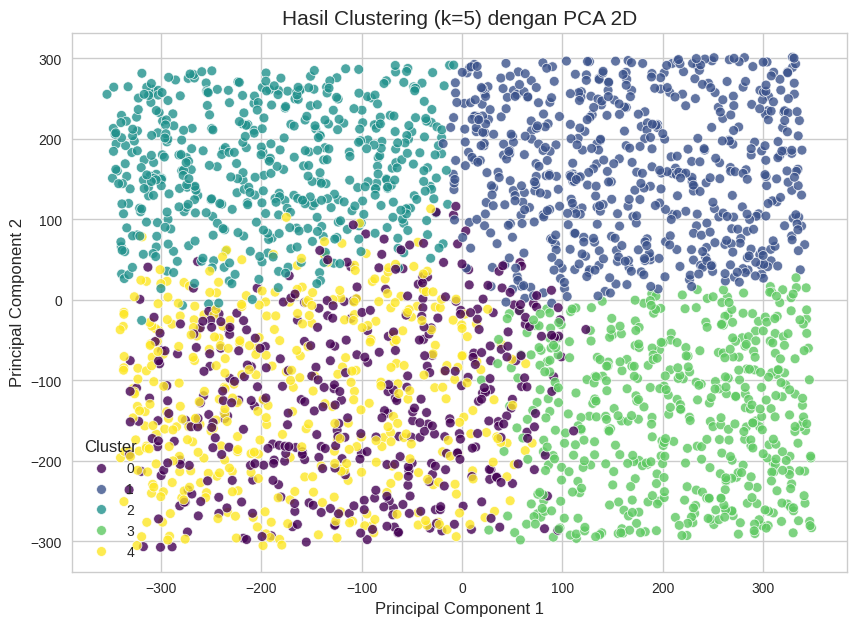

In [24]:
# Membuat visualisasi hasil clustering
print("\nVisualisasi Hasil Clustering:")
if X.empty or 'Cluster' not in X.columns:
    print("Data X kosong atau kolom 'Cluster' tidak ada. Visualisasi dilewati.")
else:
    X_for_viz = X.drop(columns=['Cluster']) # Data tanpa label cluster
    if X_for_viz.shape[1] > 2:
        pca_viz = PCA(n_components=2, random_state=42)
        X_pca_viz = pca_viz.fit_transform(X_for_viz)

        plt.figure(figsize=(10, 7))
        sns.scatterplot(x=X_pca_viz[:, 0], y=X_pca_viz[:, 1], hue=df['Cluster'], palette='viridis', s=50, alpha=0.8, legend='full')
        plt.title(f'Hasil Clustering (k={optimal_k}) dengan PCA 2D', fontsize=15)
        plt.xlabel('Principal Component 1', fontsize=12)
        plt.ylabel('Principal Component 2', fontsize=12)
        plt.legend(title='Cluster')
        plt.show()
    elif X_for_viz.shape[1] == 2:
        features_for_plot = X_for_viz.columns
        plt.figure(figsize=(10, 7))
        sns.scatterplot(x=X_for_viz[features_for_plot[0]], y=X_for_viz[features_for_plot[1]], hue=df['Cluster'], palette='viridis', s=50, alpha=0.8, legend='full')
        plt.title(f'Hasil Clustering (k={optimal_k}) 2D', fontsize=15)
        plt.xlabel(features_for_plot[0], fontsize=12)
        plt.ylabel(features_for_plot[1], fontsize=12)
        plt.legend(title='Cluster')
        plt.show()
    elif X_for_viz.shape[1] == 1:
        feature_for_plot = X_for_viz.columns[0]
        plt.figure(figsize=(10, 7))
        sns.histplot(data=df, x=feature_for_plot, hue='Cluster', palette='viridis', multiple="stack", kde=True)
        plt.title(f'Distribusi Fitur {feature_for_plot} berdasarkan Cluster (k={optimal_k})', fontsize=15)
        plt.xlabel(feature_for_plot, fontsize=12)
        plt.ylabel('Frekuensi', fontsize=12)
        plt.show()
    else:
        print("Tidak ada fitur di X_for_viz untuk divisualisasikan.")

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**


PCA Transformation and Clustering (Advanced):
Jumlah fitur asli: 15
Jumlah fitur setelah PCA: 4
Total explained variance oleh komponen PCA: 0.9900


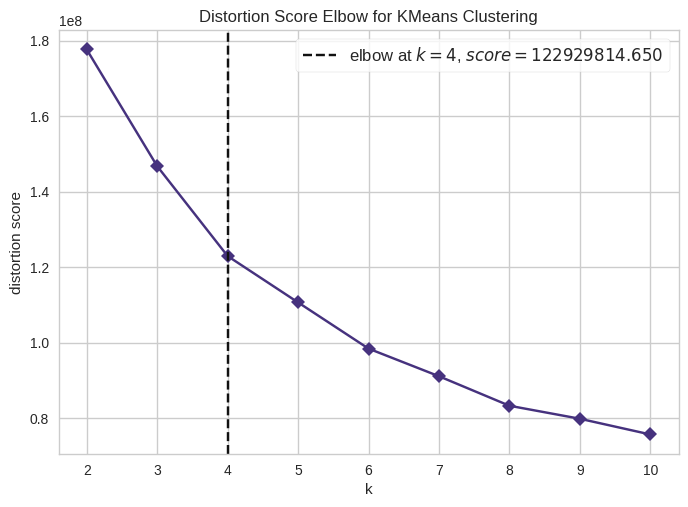

Optimal k untuk data PCA: 4
Hasil clustering (head) dengan PCA ditambahkan ke DataFrame:
   Cluster  Cluster_PCA
0        0            3
1        4            0
2        0            2
3        0            0
4        2            2


In [25]:
# Membangun model menggunakan PCA.
print("\nPCA Transformation and Clustering (Advanced):")
if X.empty or 'Cluster' not in X.columns:
    print("Data X kosong atau 'Cluster' tidak ada. PCA clustering dilewati.")
else:
    X_for_pca_model = X.drop(columns=['Cluster']) # Data asli (sudah diproses) tanpa label cluster
    if X_for_pca_model.shape[1] < 2: # PCA butuh minimal 2 fitur
        print("Tidak cukup fitur untuk PCA. Dilewati.")
    else:
        n_components_pca = 0.95 # Target 95% varians
        # Atau n_components_pca = min(X_for_pca_model.shape[1], 10) # Maks 10 komponen atau jumlah fitur
        pca = PCA(n_components=n_components_pca, random_state=42)
        X_pca_transformed = pca.fit_transform(X_for_pca_model)

        print(f"Jumlah fitur asli: {X_for_pca_model.shape[1]}")
        print(f"Jumlah fitur setelah PCA: {X_pca_transformed.shape[1]}")
        if hasattr(pca, 'explained_variance_ratio_') and X_pca_transformed.shape[1] > 0 :
            print(f"Total explained variance oleh komponen PCA: {sum(pca.explained_variance_ratio_):.4f}")

        if X_pca_transformed.shape[0] > 1 and X_pca_transformed.shape[1] > 0: # Perlu data untuk elbow
            model_elbow_pca = KMeans(random_state=42, n_init='auto')
            k_range_pca_max = min(11, X_pca_transformed.shape[0]-1 if X_pca_transformed.shape[0]>1 else 2)
            if k_range_pca_max < 2: k_range_pca_max = 2
            visualizer_pca_elbow = KElbowVisualizer(model_elbow_pca, k=(2, k_range_pca_max), metric='distortion', timings=False)
            visualizer_pca_elbow.fit(X_pca_transformed)
            visualizer_pca_elbow.show()
            optimal_k_pca = visualizer_pca_elbow.elbow_value_
        else:
            optimal_k_pca = None # Tidak bisa elbow

        if optimal_k_pca is None:
            optimal_k_pca = optimal_k # Fallback ke k dari model non-PCA
            print(f"Menggunakan k fallback untuk PCA: {optimal_k_pca}")
        else:
            print(f"Optimal k untuk data PCA: {optimal_k_pca}")

        if X_pca_transformed.shape[0] > 0 and X_pca_transformed.shape[1] > 0:
            model_kmeans_pca = KMeans(n_clusters=optimal_k_pca, random_state=42, n_init='auto')
            df['Cluster_PCA'] = model_kmeans_pca.fit_predict(X_pca_transformed)
            print("Hasil clustering (head) dengan PCA ditambahkan ke DataFrame:")
            print(df[['Cluster', 'Cluster_PCA']].head())
        else:
            print("Data hasil PCA kosong, tidak bisa melatih K-Means pada data PCA.")
            df['Cluster_PCA'] = -1 # Tandai sebagai tidak ada cluster PCA

In [26]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
if 'pca' in locals(): # Cek jika objek pca sudah dibuat
    joblib.dump(pca, "PCA_model_clustering.h5")
    print("\nObjek PCA (PCA_model_clustering.h5) berhasil disimpan.")
else:
    print("\nObjek PCA tidak ditemukan untuk disimpan.")


Objek PCA (PCA_model_clustering.h5) berhasil disimpan.


# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [27]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
print("Analisis Deskriptif per Cluster (pada data yang di-cluster, mungkin scaled/encoded):")
if 'X' in locals() and not X.empty and 'Cluster' in X.columns:
    # X sudah berisi kolom 'Cluster'
    cluster_summary_processed = X.groupby('Cluster').agg(['mean', 'min', 'max', 'std'])
    print(cluster_summary_processed)
else:
    print("DataFrame X atau kolom 'Cluster' tidak ditemukan. Tidak dapat membuat ringkasan.")

Analisis Deskriptif per Cluster (pada data yang di-cluster, mungkin scaled/encoded):
          AccountID                       TransactionAmount            \
               mean  min  max         std              mean       min   
Cluster                                                                 
0        109.899083    1  262   71.378569         -0.053997 -1.013945   
1        254.040783    0  495  139.016938         -0.082196 -1.014629   
2        241.357002    1  495  139.457081          0.004341 -1.017881   
3        257.156489    1  495  140.845719         -0.077830 -1.015896   
4        377.064516  207  495   75.977695         -0.019677 -1.017676   

                            TransactionType      ... AccountBalance            \
              max       std            mean min  ...            max       std   
Cluster                                          ...                            
0        2.059012  0.834022        0.766055   0  ...       2.512436  0.964395   
1     

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [28]:
# Pastikan nama kolom clustering sudah diubah menjadi Target

# Data yang diekspor adalah data yang digunakan untuk clustering (X tanpa kolom 'Cluster' nya)
# ditambah kolom 'Target' yang berisi label cluster dari model_kmeans (non-PCA).
if 'X' in locals() and not X.empty and 'Cluster' in X.columns:
    df_export = X.drop(columns=['Cluster'], errors='ignore').copy()
    df_export['Target'] = df['Cluster'] # Gunakan kolom 'Cluster' dari df (hasil model_kmeans utama)

    print("\nDataFrame untuk diekspor (data_clustering.csv) dengan kolom 'Target' (head):")
    print(df_export.head())
else:
    print("\nDataFrame X atau kolom 'Cluster' tidak ditemukan. Tidak dapat membuat df_export.")
    df_export = pd.DataFrame() # Buat df kosong agar tidak error di cell berikutnya


DataFrame untuk diekspor (data_clustering.csv) dengan kolom 'Target' (head):
   AccountID  TransactionAmount  TransactionType  Location  DeviceID  \
0        126          -0.970546                1        36       365   
1        450           0.268963                1        15        50   
2         18          -0.586526                1        23       229   
3         68          -0.387294                1        33       182   
4        406          -0.972736                0         1       298   

   IP Address  MerchantID  Channel  CustomerAge  CustomerOccupation  \
0         186          14        0     1.419862                   0   
1          82          51        0     1.307715                   0   
2         342           8        2    -1.439874                   3   
3         300           1        2    -1.047361                   3   
4         500          90        2     0.018031                   3   

   TransactionDuration  LoginAttempts  AccountBalance  \
0    

In [29]:
# Simpan Data
if not df_export.empty:
    df_export.to_csv('data_clustering.csv', index=False)
    print("\nFile 'data_clustering.csv' berhasil disimpan.")
else:
    print("\nTidak dapat menyimpan 'data_clustering.csv' karena df_export kosong.")


File 'data_clustering.csv' berhasil disimpan.


(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [30]:
# inverse dataset ke rentang normal untuk numerikal
# inverse dataset yang sudah diencode ke kategori aslinya.

print("Inverse Transform Data (Skilled):")

if 'df_export' in locals() and not df_export.empty:
    df_inversed = df_export.copy()

    # Inverse transform numerical features (SEMUA fitur yang di-scale)
    # 'features_to_scale' adalah list nama kolom yang di-scale sebelumnya (semua kolom di df saat scaling)
    # 'scaler' adalah objek StandardScaler yang sudah di-fit
    if 'scaler' in globals() and 'features_to_scale' in globals() and features_to_scale:
        # Kolom di df_inversed yang perlu di-inverse scale adalah yang ada di features_to_scale
        # kecuali 'Target'
        cols_for_inverse_scale = [col for col in features_to_scale if col in df_inversed.columns and col != 'Target']

        if cols_for_inverse_scale:
            # Buat DataFrame sementara hanya dengan kolom yang akan diinverse scale
            temp_df_to_scale = df_inversed[cols_for_inverse_scale]
            inversed_scaled_values = scaler.inverse_transform(temp_df_to_scale)
            df_inversed[cols_for_inverse_scale] = inversed_scaled_values

            print("Fitur numerik/scaled setelah inverse scaling (head):")
            print(df_inversed[cols_for_inverse_scale].head())
        else:
            print("Tidak ada fitur yang cocok untuk di-inverse scale.")
    else:
        print("Objek 'scaler' atau 'features_to_scale' tidak ditemukan. Inverse scaling dilewati.")

    # Inverse transform categorical features
    # 'categorical_features' adalah list nama kolom kategorikal asli (sebelum encoding)
    # 'label_encoders' adalah dictionary {nama_kolom: objek LabelEncoder}
    if 'label_encoders' in globals() and 'categorical_features' in globals() and categorical_features is not None:
        inversed_cat_cols_display = []
        for col in categorical_features: # Loop melalui daftar asli fitur kategorikal
            if col in df_inversed.columns and col in label_encoders:
                # tipe data adalah integer sebelum inverse_transform
                df_inversed[col] = label_encoders[col].inverse_transform(df_inversed[col].astype(int))
                inversed_cat_cols_display.append(col)
        if inversed_cat_cols_display:
            print("\nFitur kategorikal setelah inverse encoding (head):")
            print(df_inversed[inversed_cat_cols_display].head())
        else:
            print("Tidak ada fitur kategorikal yang di-inverse untuk ditampilkan.")
    else:
        print("Objek 'label_encoders' atau 'categorical_features' tidak ditemukan. Inverse encoding kategorikal dilewati.")

    # Inverse transform untuk fitur binned_encoded jika ada
    if 'target_bin_col_name' in locals(): # Jika binning dilakukan
        binned_encoded_col_name_check = f'{target_bin_col_name}_Binned_Encoded'
        if binned_encoded_col_name_check in df_inversed.columns and binned_encoded_col_name_check in label_encoders:
            # Ganti nama kolom menjadi lebih deskriptif setelah inverse (misal, nama bin aslinya)
            original_binned_label_col = f'{target_bin_col_name}_Binned_Original_Label'
            df_inversed[original_binned_label_col] = label_encoders[binned_encoded_col_name_check].inverse_transform(df_inversed[binned_encoded_col_name_check].astype(int))
            df_inversed.drop(columns=[binned_encoded_col_name_check], inplace=True, errors='ignore') # Hapus kolom encodednya
            print(f"\nFitur binned '{binned_encoded_col_name_check}' setelah inverse transform menjadi '{original_binned_label_col}' (head):")
            print(df_inversed[[original_binned_label_col]].head())


    print("\nDataFrame keseluruhan setelah inverse transform (head):")
    print(df_inversed.head())
else:
    print("\ndf_export kosong. Inverse transform tidak dapat dilakukan.")
    df_inversed = pd.DataFrame() # Inisialisasi df kosong

Inverse Transform Data (Skilled):
Fitur numerik/scaled setelah inverse scaling (head):
   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0              14.09         70.0                 81.0            1.0   
1             376.24         68.0                141.0            1.0   
2             126.29         19.0                 56.0            1.0   
3             184.50         26.0                 25.0            1.0   
4              13.45         45.0                198.0            1.0   

   AccountBalance  
0         5112.21  
1        13758.91  
2         1122.35  
3         8569.06  
4         7429.40  

Fitur kategorikal setelah inverse encoding (head):
  AccountID TransactionType   Location DeviceID      IP Address MerchantID  \
0   AC00128           Debit  San Diego  D000380  162.198.218.92       M015   
1   AC00455           Debit    Houston  D000051     13.149.61.4       M052   
2   AC00019           Debit       Mesa  D000235  215.97.143.157     

In [31]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal menggunakan data yang sudah diinverse.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

print("\nAnalisis Deskriptif per Cluster (pada data yang sudah di-inverse):")
if not df_inversed.empty and 'Target' in df_inversed.columns:
    # Identifikasi ulang tipe data di df_inversed
    # Kolom numerik asli (sebelum encoding)
    inversed_numerical_cols = [col for col in numerical_features_for_corr if col in df_inversed.columns] # dari EDA awal, tanpa ID
    # Kolom kategorikal asli (setelah inverse transform menjadi object)
    inversed_categorical_cols = df_inversed.select_dtypes(include='object').columns.tolist()
    # Tambahkan kolom binned yang sudah di-inverse (jika ada dan jadi object)
    if 'target_bin_col_name' in locals() and f'{target_bin_col_name}_Binned_Original_Label' in df_inversed.columns:
        binned_orig_label_col = f'{target_bin_col_name}_Binned_Original_Label'
        if binned_orig_label_col not in inversed_categorical_cols:
             inversed_categorical_cols.append(binned_orig_label_col)


    aggregations = {}
    for col in inversed_numerical_cols:
        if col != 'Target': # Target tidak diagregasi sebagai fitur
             aggregations[col] = ['mean', 'min', 'max', 'median', 'std']
    for col in inversed_categorical_cols:
        if col != 'Target':
             aggregations[col] = [lambda x: x.mode()[0] if not x.mode().empty else 'N/A', 'count', 'nunique']

    if aggregations:
        summary_inversed = df_inversed.groupby('Target').agg(aggregations)
        # Untuk tampilan yang lebih baik, transpose bisa membantu jika banyak fitur
        # print(summary_inversed.T)
        print(summary_inversed)

    else:
        print("Tidak ada fitur untuk diagregasi pada data yang di-inverse.")
else:
    print("DataFrame df_inversed kosong atau tidak ada kolom 'Target'.")


Analisis Deskriptif per Cluster (pada data yang sudah di-inverse):
       TransactionAmount                                      CustomerAge  \
                    mean   min       max   median         std        mean   
Target                                                                      
0             281.880109  1.41  899.2425  211.360  243.677980   44.454128   
1             273.641069  1.21  899.2425  211.360  238.993272   44.734095   
2             298.924832  0.26  899.2425  218.590  262.078594   43.528600   
3             274.916727  0.84  899.2425  200.535  250.136580   45.467557   
4             291.907408  0.32  899.2425  215.315  254.405245   44.898618   

                                      ... Channel CustomerOccupation        \
         min   max median        std  ... nunique         <lambda_0> count   
Target                                ...                                    
0       18.0  80.0   45.0  17.469980  ...       3            Student   433   
1  

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [32]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
print("\nMemastikan Integrasi Data Inverse dengan Kolom Target (Advanced):")
if not df_inversed.empty and 'Target' in df_inversed.columns:
    print("Kolom 'Target' sudah terintegrasi dalam df_inversed.")
    print("Contoh data df_inversed dengan kolom 'Target' (head):")
    print(df_inversed.head())
else:
    print("Kolom 'Target' tidak ditemukan di df_inversed atau df_inversed kosong.")


Memastikan Integrasi Data Inverse dengan Kolom Target (Advanced):
Kolom 'Target' sudah terintegrasi dalam df_inversed.
Contoh data df_inversed dengan kolom 'Target' (head):
  AccountID  TransactionAmount TransactionType   Location DeviceID  \
0   AC00128              14.09           Debit  San Diego  D000380   
1   AC00455             376.24           Debit    Houston  D000051   
2   AC00019             126.29           Debit       Mesa  D000235   
3   AC00070             184.50           Debit    Raleigh  D000187   
4   AC00411              13.45          Credit    Atlanta  D000308   

       IP Address MerchantID Channel  CustomerAge CustomerOccupation  \
0  162.198.218.92       M015     ATM         70.0             Doctor   
1     13.149.61.4       M052     ATM         68.0             Doctor   
2  215.97.143.157       M009  Online         19.0            Student   
3  200.13.225.150       M002  Online         26.0            Student   
4    65.164.3.100       M091  Online         

In [33]:
# Simpan Data
if not df_inversed.empty and 'Target' in df_inversed.columns:
    df_inversed.to_csv('data_clustering_inverse.csv', index=False)
    print("\nFile 'data_clustering_inverse.csv' berhasil disimpan.")
else:
    print("\nTidak dapat menyimpan 'data_clustering_inverse.csv' karena data inversed kosong atau tidak ada kolom Target.")


File 'data_clustering_inverse.csv' berhasil disimpan.
